## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
df = pd.read_csv('Train_Set_TVS.csv')
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


## 1 Data Cleaning

In [3]:
dff = df

In [4]:
df.shape

(132440, 33)

In [5]:
df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Compensation           4.713078
Vehicle_Status         6.874056
Loan_amt               0.000000
Annuity_amt            3.481577
density_Ind            4.089399
Job_Type               7.737844
Default_hist           0.000000
Prop_List              1.483691
Home_Appliances        8.278466
Region_Type            0.000000
Credit_Inq             2.031108
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.494262
Income_Alt             5.800362
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.857596
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              13.223346
c2_rated              10.058140
Contact_age            6.155995
Product_

### EXPLORATORY ANALYSIS

In [8]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [9]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0,0.0


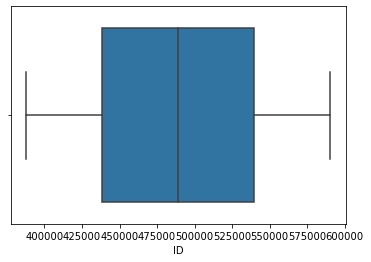

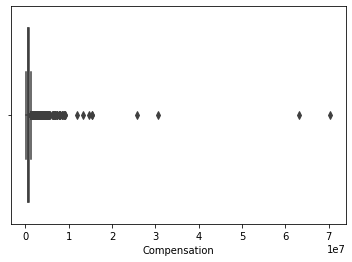

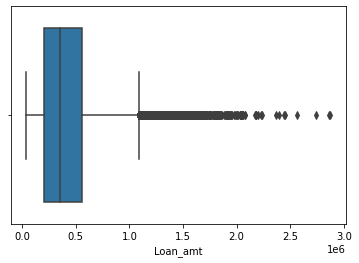

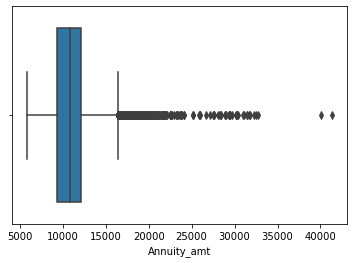

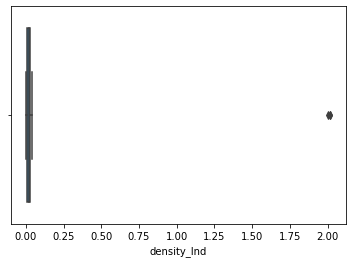

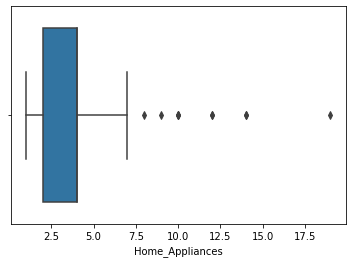

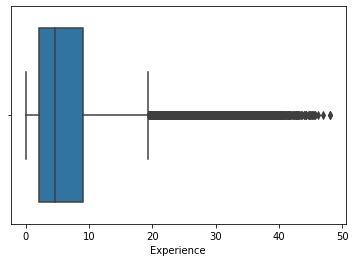

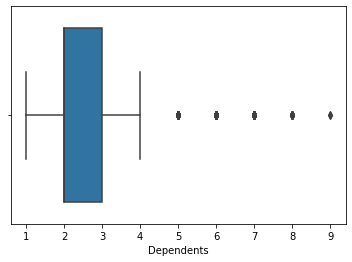

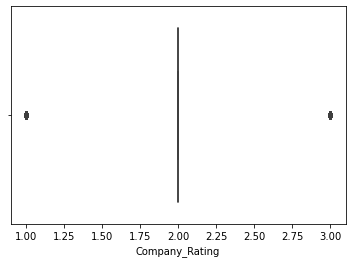

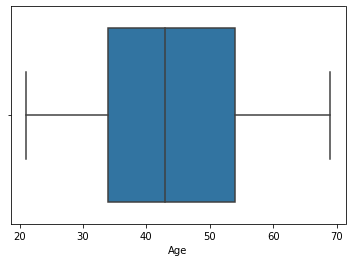

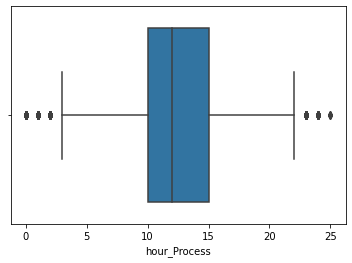

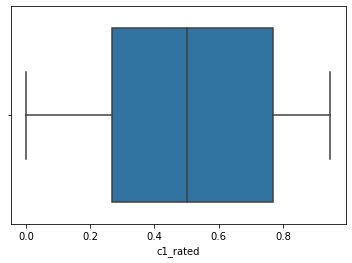

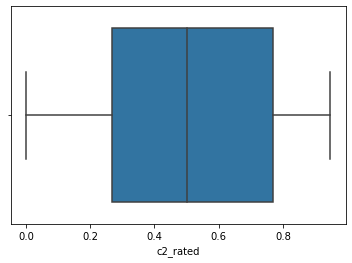

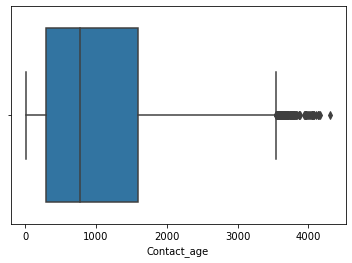

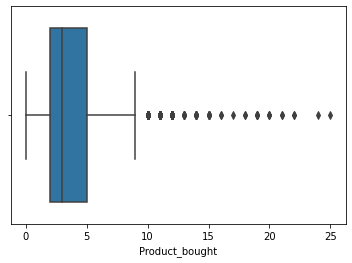

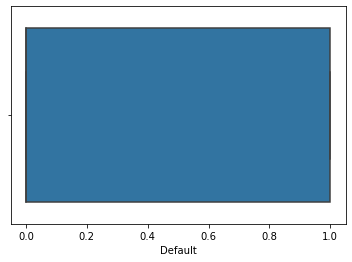

In [10]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [11]:
df['Compensation'].fillna(df['Compensation'].median(),inplace = True)

In [12]:
df['Vehicle_Status'].mode()[0]

'N'

In [13]:
df['Vehicle_Status'].fillna(df['Vehicle_Status'].mode()[0],inplace = True)

In [14]:
df['Annuity_amt'].fillna(df['Annuity_amt'].median(),inplace = True)

In [15]:
df['density_Ind'].mean(),df['density_Ind'].median()

(0.020446197568964243, 0.0204)

In [16]:
df['density_Ind'].fillna(df['density_Ind'].median(),inplace = True)

In [17]:
df['Job_Type'].fillna(df['Job_Type'].mode()[0],inplace = True)

In [18]:
df['Prop_List'].mode()

0    One
dtype: object

In [19]:
df['Prop_List'].fillna(df['Prop_List'].mode()[0],inplace = True)

In [20]:
df['Home_Appliances'].fillna(df['Home_Appliances'].mode()[0],inplace = True)

In [21]:
df['Credit_Inq'].value_counts(normalize = True)

1     0.516933
2     0.234004
3     0.178636
>4    0.070428
Name: Credit_Inq, dtype: float64

In [22]:
df['Credit_Inq'].fillna(df['Credit_Inq'].mode()[0],inplace = True)

In [23]:
df['Experience'].mean(),df['Experience'].median()

(6.580615760205829, 4.6)

In [24]:
df['Experience'].fillna(df['Experience'].median(),inplace = True)

In [25]:
df['Income_Alt'].value_counts(normalize = True)

Not_Specified    0.720178
Y                0.279822
Name: Income_Alt, dtype: float64

In [26]:
df['Income_Alt'].fillna(df['Income_Alt'].mode()[0],inplace = True)

In [27]:
df['Company_Rating'].median()

2.0

In [28]:
df['Company_Rating'].fillna(df['Company_Rating'].median(),inplace = True)

In [29]:
df['c1_rated'].fillna(df['c1_rated'].median(),inplace = True)

In [30]:
df['c2_rated'].fillna(df['c2_rated'].median(),inplace = True)

<AxesSubplot:xlabel='Contact_age'>

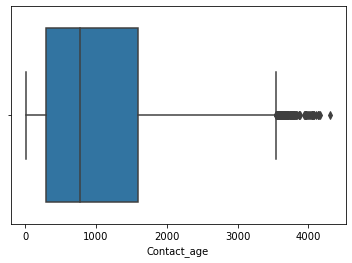

In [31]:
sns.boxplot(df['Contact_age'])

In [32]:
df['Contact_age'].fillna(df['Contact_age'].median(),inplace = True)

In [33]:
df.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [34]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [35]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,4.0,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,4.6,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,0.500,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,0.500,0.200,2339.0,6.0,0.0


In [36]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].value_counts(normalize = True))
    

Vehicle_Status
N    0.683132
Y    0.316868
Name: Vehicle_Status, dtype: float64
Job_Type
IT        0.583132
Non-IT    0.222652
Govt.     0.194216
Name: Job_Type, dtype: float64
Default_hist
ndf    0.899804
df     0.100196
Name: Default_hist, dtype: float64
Prop_List
One             0.706161
Morethan_One    0.195530
None            0.098309
Name: Prop_List, dtype: float64
Region_Type
Metro    0.812051
Rural    0.168212
other    0.019737
Name: Region_Type, dtype: float64
Credit_Inq
1     0.526744
2     0.229251
3     0.175008
>4    0.068997
Name: Credit_Inq, dtype: float64
Education_det
Grad      0.708683
P_Grad    0.245069
Other     0.046247
Name: Education_det, dtype: float64
Marital_Stat
Married    0.737005
Single     0.148475
Divorce    0.063357
Widow      0.051163
Name: Marital_Stat, dtype: float64
Gen
M    0.657377
F    0.342623
Name: Gen, dtype: float64
Credit_Lnks
1_to_3    0.887979
4_to_6    0.099532
>6        0.012489
Name: Credit_Lnks, dtype: float64
Income_Alt
Not_Specified  

In [37]:
df_num.drop('ID',axis = 1,inplace=True)

In [38]:
plt.rcParams['figure.figsize']=[10,8]

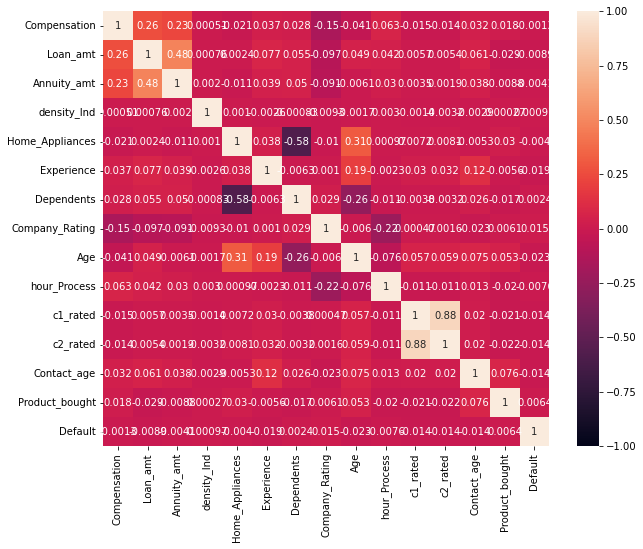

In [39]:
sns.heatmap(df_num.corr(),annot = True,vmin = -1,vmax = +1)
plt.show()

In [40]:
plt.rcParams['figure.figsize']=[7,5]

Compensation


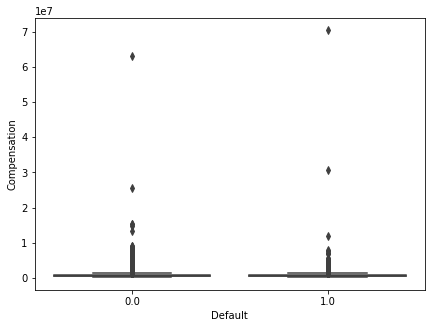

Loan_amt


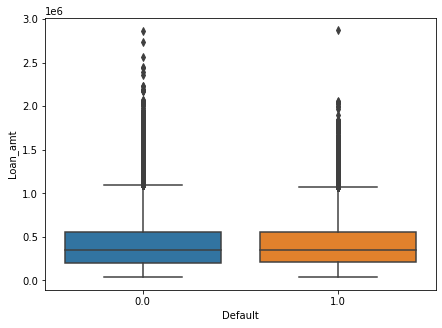

Annuity_amt


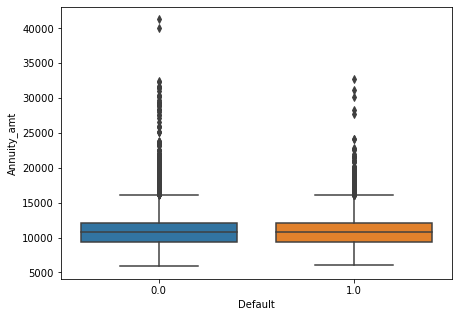

density_Ind


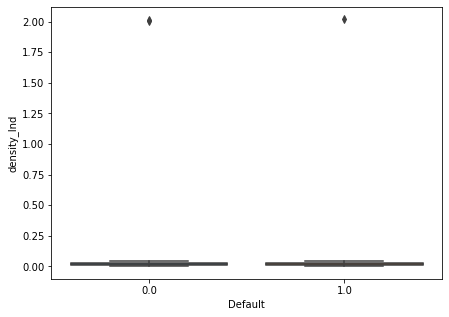

Home_Appliances


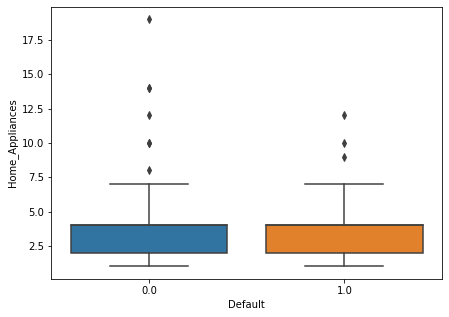

Experience


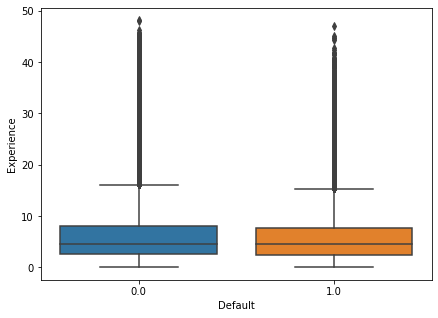

Dependents


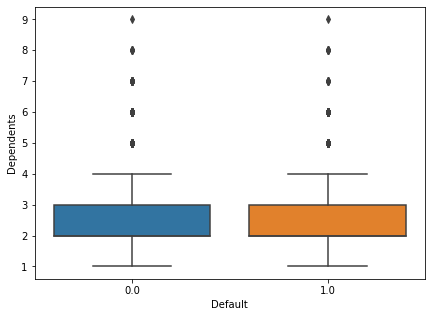

Company_Rating


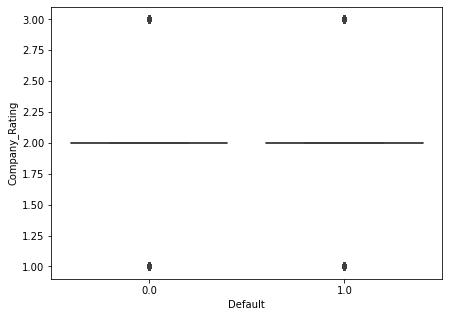

Age


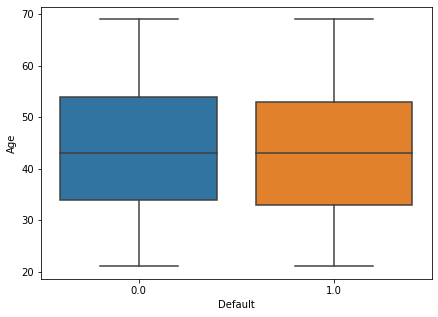

hour_Process


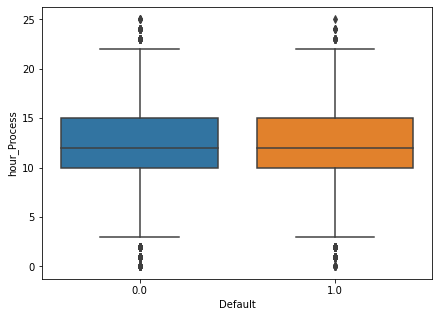

c1_rated


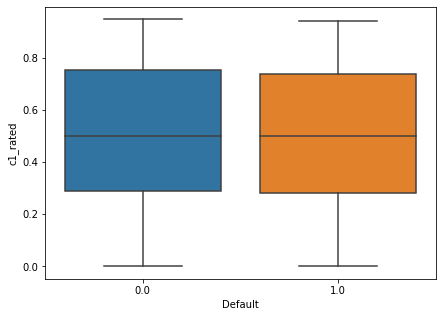

c2_rated


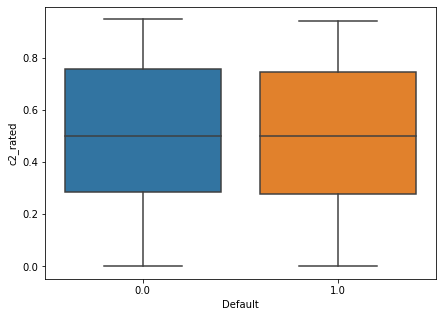

Contact_age


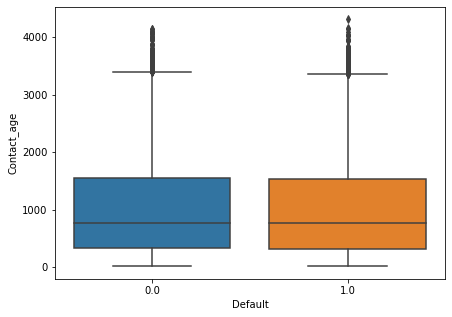

Product_bought


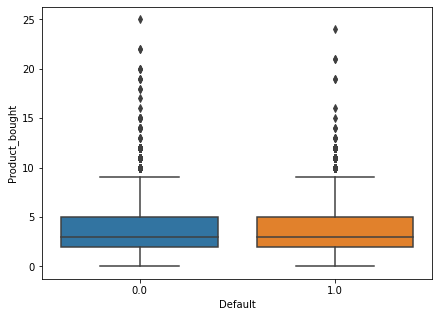

Default


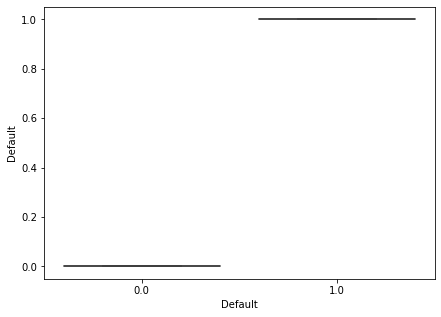

In [41]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df['Default'],df[i])
    plt.show()

In [42]:
df.drop(columns = ['c1_rated'],inplace = True) ##Highly correlated with c2_rated .Therfore droped one of those ie c1_rated

In [43]:
df['Compensation'].describe()

count    1.324400e+05
mean     7.413259e+05
std      4.593658e+05
min      1.527280e+05
25%      5.251670e+05
50%      6.659960e+05
75%      8.657610e+05
max      7.037702e+07
Name: Compensation, dtype: float64

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [44]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
df_cat.drop(columns = ['Addr_permanent','Permanent_Addr_tag'],inplace = True)

In [47]:
df_cat.drop(columns = ['Day_Process','Ph.No'],inplace = True)

In [48]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Type_Loan,Region
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,CLoan,East
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,CLoan,North
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,CLoan,North
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,RLoan,South
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,CLoan,North


([<matplotlib.patches.Wedge at 0x27d33d28cd0>,
 [Text(-0.7420990605035872, 0.8119661226921314, '0'),
  Text(0.742099060503587, -0.8119661226921315, '1')],
 [Text(-0.4047813057292293, 0.4428906123775262, '73.57'),
  Text(0.40478130572922927, -0.44289061237752625, '26.43')])

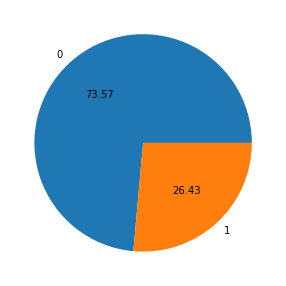

In [50]:
plt.pie(df_num['Default'].value_counts(),labels = [0,1],autopct = '%.2f')

In [51]:
df_num.drop(columns = ['c1_rated'],inplace = True)

In [52]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Type_Loan,Region
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,CLoan,East
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,CLoan,North
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,CLoan,North
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,RLoan,South
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,CLoan,North


######  Statsistical Analysis

In [53]:
from scipy import stats
from scipy.stats import chi2_contingency,chi2,chisquare

In [55]:
### Chisquare contingency test to check  independence btw various categorical and target varible
### H0 : The values are independent 
### H1 : The values are dependent 
### apla = 0.05(we are providing inferences with 95 percent of confidence)

In [54]:
df_num['Default'] = df_num['Default'].astype('object')

In [55]:
lt = []
def chi(x,y):
    tab = pd.crosstab(x,y)
    obs = tab.values
    r = x.nunique()
    c = y.nunique()
    chi_crit = stats.chi2.isf(0.05,df = (r-1)*(c-1))
    tval,pval,dof,exp_val = chi2_contingency(observed = obs,correction = False)
    if tval>chi_crit and pval<0.05:
        print('Null hypo rejected ',i,' and Default are dependent' )
        lt.append(i)
    else:
        print('Null hypo accepted  ',i,' and Default are independent' )
        

In [56]:
for i in df_cat.columns:
    chi(df_cat[i],df_num['Default'])

Null hypo rejected  Vehicle_Status  and Default are dependent
Null hypo accepted   Job_Type  and Default are independent
Null hypo accepted   Default_hist  and Default are independent
Null hypo accepted   Prop_List  and Default are independent
Null hypo accepted   Region_Type  and Default are independent
Null hypo rejected  Credit_Inq  and Default are dependent
Null hypo rejected  Education_det  and Default are dependent
Null hypo accepted   Marital_Stat  and Default are independent
Null hypo rejected  Gen  and Default are dependent
Null hypo rejected  Credit_Lnks  and Default are dependent
Null hypo accepted   Income_Alt  and Default are independent
Null hypo rejected  Type_Loan  and Default are dependent
Null hypo rejected  Region  and Default are dependent


In [57]:
print(lt)

['Vehicle_Status', 'Credit_Inq', 'Education_det', 'Gen', 'Credit_Lnks', 'Type_Loan', 'Region']


##### Inference 
######  The variables 'Vehicle_Status', 'Credit_Inq', 'Education_det', 'Gen', 'Credit_Lnks', 'Type_Loan', 'Region' have 
###### an impact of whether the loaner would default the loan or not.

In [58]:
### ANN0VA test to check  independence btw various numerical and target varible
### H0 : The means are equal ie  values are independent 
### H1 : The means are different ie the values are dependent 
### apla = 0.05(we are providing inferences with 95 percent of confidence)
### Asuming the data is normal and has equal variance

In [59]:
df_num.skew()

Compensation       51.249445
Loan_amt            1.375253
Annuity_amt         0.688440
density_Ind        55.603200
Home_Appliances    -1.133765
Experience          2.233831
Dependents          0.886568
Company_Rating      0.076357
Age                 0.118174
hour_Process       -0.021477
c2_rated           -0.018369
Contact_age         0.780406
Product_bought      0.798961
Default             1.069039
dtype: float64

In [60]:
np.log(df_num['Compensation']).skew()

0.425646979907237

In [61]:
df_num.var()

Compensation       2.110169e+11
Loan_amt           7.544843e+10
Annuity_amt        4.102110e+06
density_Ind        2.180101e-04
Home_Appliances    1.460387e+00
Experience         3.428673e+01
Dependents         8.263649e-01
Company_Rating     2.313616e-01
Age                1.431062e+02
hour_Process       1.272145e+01
c2_rated           6.494865e-02
Contact_age        6.484526e+05
Product_bought     4.722996e+00
Default            1.944474e-01
dtype: float64

In [62]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [63]:
xt = pt.fit_transform(df_num)
df_num = pd.DataFrame(data = xt,columns = df_num.columns)

In [64]:
df_num.skew()

Compensation       0.000000
Loan_amt          -0.012618
Annuity_amt        0.000000
density_Ind       -0.037286
Home_Appliances    2.120848
Experience         0.002800
Dependents         0.006796
Company_Rating     0.069004
Age               -0.053664
hour_Process      -0.016229
c2_rated          -0.058611
Contact_age       -0.267519
Product_bought    -0.021951
Default            1.069039
dtype: float64

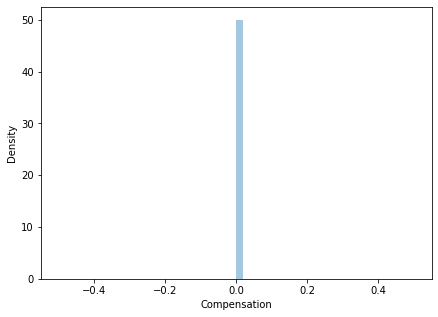

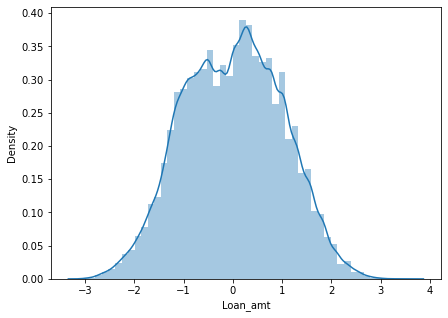

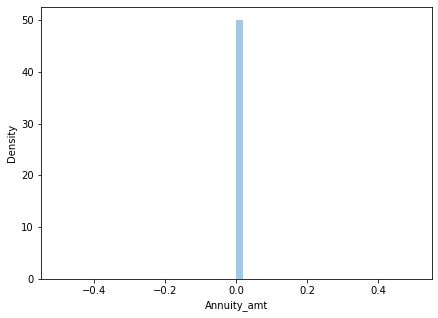

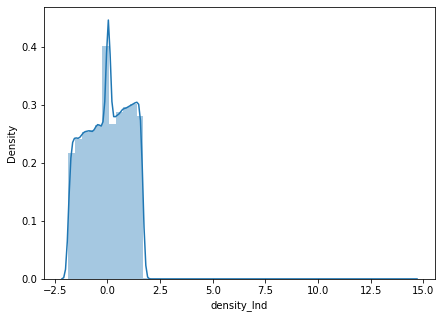

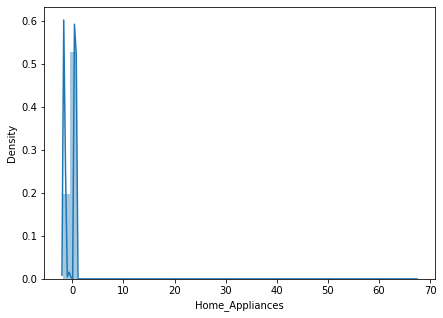

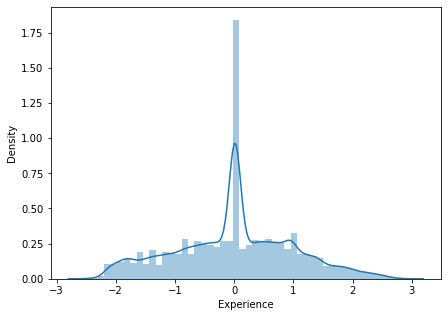

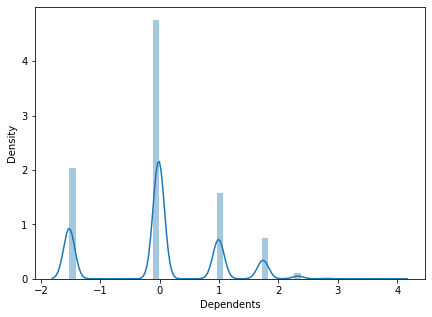

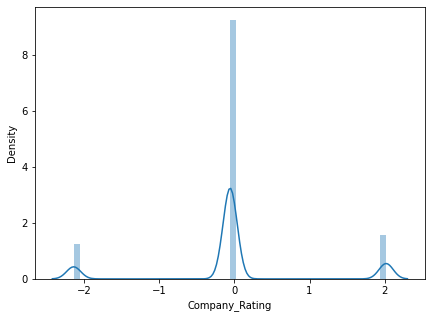

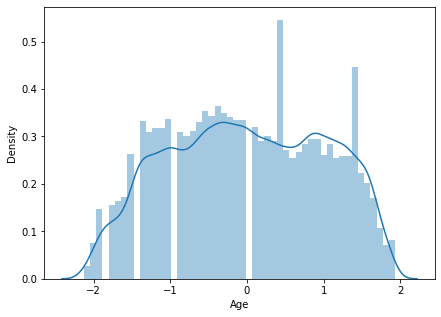

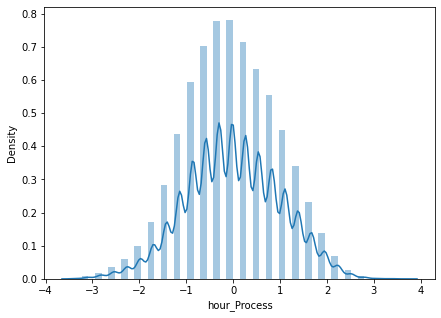

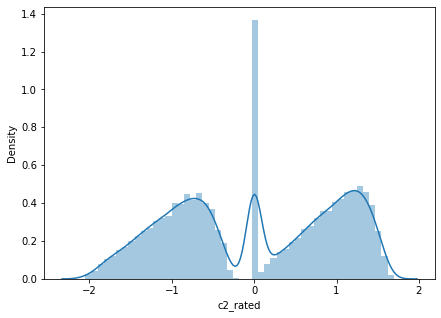

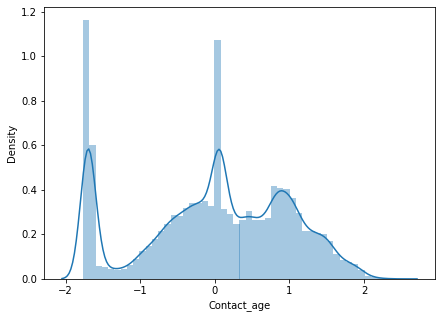

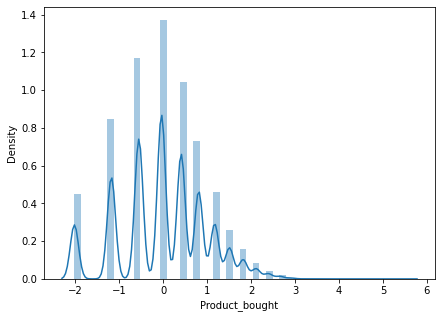

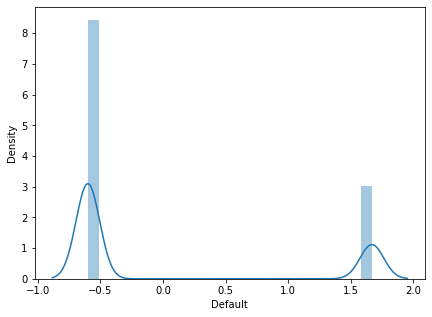

In [65]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()
    

In [66]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [67]:
df_num_scaled = pd.DataFrame(SS.fit_transform(df_num),columns = df_num.columns)

In [68]:
df_num_scaled.var()

Compensation       0.000000
Loan_amt           1.000008
Annuity_amt        0.000000
density_Ind        1.000008
Home_Appliances    1.000008
Experience         1.000008
Dependents         1.000008
Company_Rating     1.000008
Age                1.000008
hour_Process       1.000008
c2_rated           1.000008
Contact_age        1.000008
Product_bought     1.000008
Default            1.000008
dtype: float64

In [69]:
df_num_scaled.drop(columns = ['Default'],inplace = True)

In [70]:
## Assumptions satisfied, i-e normal data with more or less equal variances

In [71]:
df_cat_dummy = pd.get_dummies(df_cat,drop_first = True)

In [72]:
df_cat_dummy.head()

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,...,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [73]:
df_num_scaled.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c2_rated,Contact_age,Product_bought
0,0.0,1.009943,0.0,0.888069,0.580147,-1.548728,0.991634,-0.057155,0.228539,-0.578563,-1.721084,-1.671860,-0.553063
1,0.0,-0.801363,0.0,-0.048501,-1.750963,-0.463483,0.991634,-2.139674,0.228539,-0.017970,-1.272932,-0.647768,0.409713
2,0.0,-1.717829,0.0,-0.739552,0.580147,0.014096,-0.015691,2.018931,1.080244,-1.976878,0.146886,-0.700206,0.409713
3,0.0,-0.943523,0.0,1.439674,-1.264533,0.038999,1.739385,-0.057155,-0.359573,-0.017970,0.236263,-1.652236,0.409713
4,0.0,0.790893,0.0,-0.554055,-1.750963,0.494363,0.991634,-2.139674,-0.994709,1.104783,-1.206763,1.382892,1.172224


In [74]:
df_num_scaled['Default'] = dff['Default']

In [75]:
df_num_scaled.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c2_rated,Contact_age,Product_bought,Default
0,0.0,1.009943,0.0,0.888069,0.580147,-1.548728,0.991634,-0.057155,0.228539,-0.578563,-1.721084,-1.671860,-0.553063,1.0
1,0.0,-0.801363,0.0,-0.048501,-1.750963,-0.463483,0.991634,-2.139674,0.228539,-0.017970,-1.272932,-0.647768,0.409713,0.0
2,0.0,-1.717829,0.0,-0.739552,0.580147,0.014096,-0.015691,2.018931,1.080244,-1.976878,0.146886,-0.700206,0.409713,0.0
3,0.0,-0.943523,0.0,1.439674,-1.264533,0.038999,1.739385,-0.057155,-0.359573,-0.017970,0.236263,-1.652236,0.409713,0.0
4,0.0,0.790893,0.0,-0.554055,-1.750963,0.494363,0.991634,-2.139674,-0.994709,1.104783,-1.206763,1.382892,1.172224,0.0


In [78]:
for i in df_num_scaled.drop(columns = ['Default']).columns:
    AN(i,df_num_scaled['Default'])

Null Hypo accepted ie  Compensation  has  no  influence in defaulting a loan
Null Hypo accepted ie  Loan_amt  has  no  influence in defaulting a loan
Null Hypo accepted ie  Annuity_amt  has  no  influence in defaulting a loan
Null Hypo accepted ie  density_Ind  has  no  influence in defaulting a loan
Null Hypo accepted ie  Home_Appliances  has  no  influence in defaulting a loan
Null Hypo rejected ie  Experience  has an influence in defaulting a loan
Null Hypo accepted ie  Dependents  has  no  influence in defaulting a loan
Null Hypo rejected ie  Company_Rating  has an influence in defaulting a loan
Null Hypo rejected ie  Age  has an influence in defaulting a loan
Null Hypo rejected ie  hour_Process  has an influence in defaulting a loan
Null Hypo rejected ie  c2_rated  has an influence in defaulting a loan
Null Hypo rejected ie  Contact_age  has an influence in defaulting a loan
Null Hypo rejected ie  Product_bought  has an influence in defaulting a loan


In [77]:
lt = []
def AN(x,y):
    a = df_num_scaled.loc[(df_num_scaled['Default']==0),[x]]
    b = df_num_scaled.loc[(df_num_scaled['Default']==1),[x]]
    t = y.nunique()
    n = len(df_num_scaled)
    f_crit = stats.f.isf(0.05,dfn = t-1,dfd = n-t)
    f_stat, pval = stats.f_oneway(a,b)
    if f_stat>f_crit and pval<0.05:
        print('Null Hypo rejected ie ',x,' has an influence in defaulting a loan')
        lt.append(x)
    else:
        print('Null Hypo accepted ie ',x,' has  no  influence in defaulting a loan')
        
        

In [79]:
print(lt)

['Experience', 'Company_Rating', 'Age', 'hour_Process', 'c2_rated', 'Contact_age', 'Product_bought']


#### Inferene 
###### The Variables 'Experience', 'Company_Rating', 'Age', 'hour_Process', 'c2_rated', 'Contact_age', 'Product_bought' has 
###### influence if a loaner would default or not 

In [80]:
df_scaled_final = pd.concat([df_num_scaled,df_cat_dummy],axis=1)

In [81]:
df_scaled_final.reset_index(drop = True,inplace = True)

In [82]:
df_scaled_final.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,...,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,0.0,1.009943,0.0,0.888069,0.580147,-1.548728,0.991634,-0.057155,0.228539,-0.578563,...,0,0,0,0,0,0,0,1,0,0
1,0.0,-0.801363,0.0,-0.048501,-1.750963,-0.463483,0.991634,-2.139674,0.228539,-0.017970,...,0,0,1,0,0,0,0,0,1,0
2,0.0,-1.717829,0.0,-0.739552,0.580147,0.014096,-0.015691,2.018931,1.080244,-1.976878,...,0,0,1,0,0,0,0,0,1,0
3,0.0,-0.943523,0.0,1.439674,-1.264533,0.038999,1.739385,-0.057155,-0.359573,-0.017970,...,0,0,1,0,0,0,1,0,0,1
4,0.0,0.790893,0.0,-0.554055,-1.750963,0.494363,0.991634,-2.139674,-0.994709,1.104783,...,0,0,0,1,0,1,0,0,1,0


In [83]:
list(df_num['Default'])

[1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 1.6684027068652123,
 -0.599375675839627,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 -0.599375675839627,
 1.6684027068652123,
 1.6684027068

In [84]:
df_scaled_final = df_scaled_final.assign(Default = list(dff['Default']))

In [85]:
df_scaled_final.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,...,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,0.0,1.009943,0.0,0.888069,0.580147,-1.548728,0.991634,-0.057155,0.228539,-0.578563,...,0,0,0,0,0,0,0,1,0,0
1,0.0,-0.801363,0.0,-0.048501,-1.750963,-0.463483,0.991634,-2.139674,0.228539,-0.017970,...,0,0,1,0,0,0,0,0,1,0
2,0.0,-1.717829,0.0,-0.739552,0.580147,0.014096,-0.015691,2.018931,1.080244,-1.976878,...,0,0,1,0,0,0,0,0,1,0
3,0.0,-0.943523,0.0,1.439674,-1.264533,0.038999,1.739385,-0.057155,-0.359573,-0.017970,...,0,0,1,0,0,0,1,0,0,1
4,0.0,0.790893,0.0,-0.554055,-1.750963,0.494363,0.991634,-2.139674,-0.994709,1.104783,...,0,0,0,1,0,1,0,0,1,0


In [86]:
df_scaled_final.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c2_rated', 'Contact_age', 'Product_bought', 'Default',
       'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Non-IT',
       'Default_hist_ndf', 'Prop_List_None', 'Prop_List_One',
       'Region_Type_Rural', 'Region_Type_other', 'Credit_Inq_2',
       'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other',
       'Education_det_P_Grad', 'Marital_Stat_Married', 'Marital_Stat_Single',
       'Marital_Stat_Widow', 'Gen_M', 'Credit_Lnks_4_to_6', 'Credit_Lnks_>6',
       'Income_Alt_Y', 'Type_Loan_RLoan', 'Region_East', 'Region_North',
       'Region_South'],
      dtype='object')

In [87]:
df_scaled_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Compensation          132440 non-null  float64
 1   Loan_amt              132440 non-null  float64
 2   Annuity_amt           132440 non-null  float64
 3   density_Ind           132440 non-null  float64
 4   Home_Appliances       132440 non-null  float64
 5   Experience            132440 non-null  float64
 6   Dependents            132440 non-null  float64
 7   Company_Rating        132440 non-null  float64
 8   Age                   132440 non-null  float64
 9   hour_Process          132440 non-null  float64
 10  c2_rated              132440 non-null  float64
 11  Contact_age           132440 non-null  float64
 12  Product_bought        132440 non-null  float64
 13  Default               132440 non-null  float64
 14  Vehicle_Status_Y      132440 non-null  uint8  
 15  

## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [88]:
x = df_scaled_final.drop(columns = ['Default'])
y = df_scaled_final['Default']

In [89]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 123,stratify = y)

In [91]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((92708, 37), (39732, 37), (92708,), (39732,))

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [93]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()



####    MODEL 1


In [94]:
DC = DecisionTreeClassifier()
DC_mod = DC.fit(xtrain,ytrain)
ypred_dc = DC_mod.predict(xtest)


In [95]:
print(classification_report(ytest,ypred_dc))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     29231
         1.0       0.27      0.29      0.28     10501

    accuracy                           0.60     39732
   macro avg       0.50      0.50      0.50     39732
weighted avg       0.61      0.60      0.61     39732



In [96]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain,ytrain)
ypred_rf = RF_mod.predict(xtest)


In [97]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29231
         1.0       0.34      0.00      0.01     10501

    accuracy                           0.74     39732
   macro avg       0.54      0.50      0.43     39732
weighted avg       0.63      0.74      0.62     39732



In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10,12,15],
                     'max_leaf_nodes': [10,12,15],
                    'min_samples_split':[2,3,4]}]

rf= RandomForestClassifier(random_state = 123)

grid_model_rf = GridSearchCV(estimator = rf , param_grid = tuned_paramaters,cv = 5)

rf_tuned = grid_model_rf.fit(xtrain,ytrain)

print(' Best parameters: ',grid_model_rf.best_params_,'\n')

In [98]:
xgb_mod =xgb_cl.fit(xtrain,ytrain)
ypred_xgb = xgb_mod.predict(xtest)


[18:05:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85     29231
         1.0       0.28      0.01      0.01     10501

    accuracy                           0.73     39732
   macro avg       0.51      0.50      0.43     39732
weighted avg       0.62      0.73      0.63     39732



In [100]:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier(n_estimators = 500)

In [101]:
AD_mod =AD.fit(xtrain,ytrain)
ypred_ad = AD_mod.predict(xtest)
print(classification_report(ytest,ypred_ad))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29231
         1.0       0.32      0.00      0.00     10501

    accuracy                           0.74     39732
   macro avg       0.53      0.50      0.42     39732
weighted avg       0.63      0.74      0.62     39732



In [103]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators = 500)

In [104]:
GB_mod =GB.fit(xtrain,ytrain)
ypred_gb = GB_mod.predict(xtest)
print(classification_report(ytest,ypred_gb))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29231
         1.0       0.27      0.00      0.00     10501

    accuracy                           0.73     39732
   macro avg       0.50      0.50      0.43     39732
weighted avg       0.61      0.73      0.62     39732



###### DOWNSAMPLING THE MAJORITY CLASS 

###### Since the recall and precision for 1 ie defaulters is not increasing much ,lets try doing down-Sampling of the Majority Calss

In [105]:
df_scaled_final['Default'].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

In [106]:
df_new = df_scaled_final

In [107]:
df_zero = df_new[df_new['Default']==0].sample(35004)

In [108]:
df_one = df_new[df_new['Default']==1]

In [109]:
df_zero.shape,df_one.shape

((35004, 38), (35004, 38))

In [110]:
df_balanced =  pd.concat([df_zero,df_one],keys= df_zero.columns ,axis = 0,ignore_index = True )

In [111]:
df_balanced.shape

(70008, 38)

In [112]:
df_balanced['Default'].value_counts()

0.0    35004
1.0    35004
Name: Default, dtype: int64

In [113]:
x = df_balanced.drop(['Default'],1)
y = df_balanced['Default']

In [114]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 123,stratify = y,test_size = 0.30)

In [115]:
DC_mod = DC.fit(xtrain,ytrain)
ypred_dc = DC_mod.predict(xtest)
print(classification_report(ytest,ypred_dc))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     10502
         1.0       0.50      0.49      0.50     10501

    accuracy                           0.50     21003
   macro avg       0.50      0.50      0.50     21003
weighted avg       0.50      0.50      0.50     21003



In [116]:
RF_mod = RF.fit(xtrain,ytrain)
ypred_rf = RF_mod.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52     10502
         1.0       0.51      0.48      0.50     10501

    accuracy                           0.51     21003
   macro avg       0.51      0.51      0.51     21003
weighted avg       0.51      0.51      0.51     21003



In [117]:
xgb_mod = xgb_cl.fit(xtrain,ytrain)
ypred_xgb = xgb_mod.predict(xtest)
print(classification_report(ytest,ypred_xgb))

[18:18:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     10502
         1.0       0.51      0.51      0.51     10501

    accuracy                           0.51     21003
   macro avg       0.51      0.51      0.51     21003
weighted avg       0.51      0.51      0.51     21003



### UPSAMPLING THE MINORITY CLASS

In [120]:
df_scaled_final['Default'].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

In [122]:
df_zero = df_scaled_final[df_scaled_final['Default']== 0]
df_one = df_scaled_final[df_scaled_final['Default']== 1].sample(97436,replace = True)

In [124]:
df_balance = pd.concat([df_zero,df_one],0,keys = df_zero.columns,ignore_index = True)

In [125]:
df_balance.shape

(194872, 38)

In [126]:
x = df_balance.drop(columns = ['Default'])
y = df_balance['Default']

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 123,stratify = y,test_size = 0.30)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((136410, 37), (58462, 37), (136410,), (58462,))

In [129]:
DC_mod = DC.fit(xtrain,ytrain)
ypred_dc = DC_mod.predict(xtest)
print(classification_report(ytest,ypred_dc))

              precision    recall  f1-score   support

         0.0       0.87      0.68      0.77     29231
         1.0       0.74      0.90      0.81     29231

    accuracy                           0.79     58462
   macro avg       0.81      0.79      0.79     58462
weighted avg       0.81      0.79      0.79     58462



In [130]:
RF_mod = RF.fit(xtrain,ytrain)
ypred_rf = RF_mod.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     29231
         1.0       0.97      0.86      0.91     29231

    accuracy                           0.92     58462
   macro avg       0.92      0.92      0.92     58462
weighted avg       0.92      0.92      0.92     58462



In [131]:
xgb_mod = xgb_cl.fit(xtrain,ytrain)
ypred_xgb = xgb_mod.predict(xtest)
print(classification_report(ytest,ypred_xgb))

[18:28:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.60      0.59      0.59     29231
         1.0       0.60      0.61      0.60     29231

    accuracy                           0.60     58462
   macro avg       0.60      0.60      0.60     58462
weighted avg       0.60      0.60      0.60     58462



In [132]:
### Here the final model has to be random forest with 92 percenct accuracy .

## Descriptive Section

In [137]:
imp_features = pd.DataFrame({'Features':xtrain.columns,
                            'Importances':RF_mod.feature_importances_})
imp_features= imp_features.sort_values('Importances',ascending = False)
inpp = imp_features.head(15)

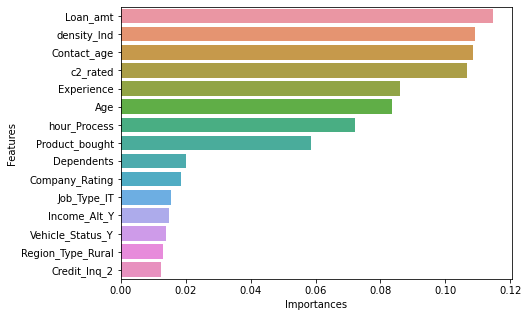

In [138]:
sns.barplot(data = inpp ,x = 'Importances',y = 'Features')
plt.show()

In [139]:
#### The above are the top 15 features having an influence for a loaner to default or not .